## Python notebook template block Adventure Work On BikeBuyers
#### Group 6
#### Team members: 马晨烨、杨潇林、吴菲涵、阮扬程、秦睿思

- Product owner ：马晨烨
- Product manager ：秦睿思
- Business translator ：吴菲涵
- Data scientist ：阮扬程
- Data engineer ：杨潇林


As of now, you created a new notebook for your study with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about AD should be in this one template. Go back to the code you wrote, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. 

This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. 

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️


### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns 
from sklearn.metrics import roc_curve, auc,PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:

# 读取Excel文件并显示前几行数据
df = pd.read_excel('E:/STUDY/Second/Second Down/ML/BikeBuyers2.xlsx')
df.head(5)

,ProspectiveBuyerKey,ProspectAlternateKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,NumberCarsOwned,AddressLine1,AddressLine2,City,StateProvinceCode,PostalCode,Phone,Salutation,Amount,Category
0,1,21596444800,Adam,NaN,Alexander,1940-07-02,M,M,aalexander@lucernepublishing.com,40000.0,...,2.0,566 S. Main,NaN,Cedar City,UT,84720,516-555-0187,Mr.,0,Category 5
1,2,3003,Adrienne,NaN,Alonso,1944-09-06,M,F,aalonso@alpineskihouse.com,80000.0,...,2.0,7264 St. Peter Court,NaN,Colma,CA,94014,607-555-0119,Ms.,4,Category 3
2,3,1077,Alfredo,B,Alvarez,1958-10-01,S,M,aalvarez@fineartschool.net,130000.0,...,4.0,8850 Via Del Sol,NaN,Lynnwood,WA,98036,1 (11) 500 555-0143,Mr.,1,Category 4
3,4,4779,Arthur,A,Arun,1979-09-23,S,M,aarun@adventure-works.com,50000.0,...,2.0,7515 Royal Oak Rd.,NaN,Chula Vista,CA,91910,403-555-0186,Mr.,4,Category 1
4,5,38032399400,Andrea,M,Bailey,1959-10-28,M,F,abailey@lucernepublishing.com,10000.0,...,0.0,2500 North Stemmons Freeway,NaN,Dallas,TX,75201,1 (11) 500 555-0113,Ms.,4,Category 9


In [3]:
# 了解每一列的结构
df.info()
# 了解每一列的统计信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProspectiveBuyerKey   2059 non-null   int64         
 1   ProspectAlternateKey  2059 non-null   int64         
 2   FirstName             2059 non-null   object        
 3   MiddleName            1207 non-null   object        
 4   LastName              2059 non-null   object        
 5   BirthDate             2059 non-null   datetime64[ns]
 6   MaritalStatus         2059 non-null   object        
 7   Gender                2059 non-null   object        
 8   EmailAddress          2059 non-null   object        
 9   YearlyIncome          1874 non-null   float64       
 10  TotalChildren         2018 non-null   float64       
 11  NumberChildrenAtHome  2059 non-null   int64         
 12  Education             2059 non-null   object        
 13  Occupation        

## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

- by 杨潇林

In [4]:

#缺失值处理
df.drop(['FirstName', 'LastName'], axis=1, inplace=True) 
df = df[df['TotalChildren'] >= df['NumberChildrenAtHome']] 
df.dropna(subset=['YearlyIncome', 'TotalChildren', 'NumberCarsOwned'], inplace=True) 

#转换时间格式
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['YearlyIncome'] = df['YearlyIncome'].astype(int)
df['Age'] = pd.to_datetime('today').year - pd.to_datetime(df['BirthDate']).dt.year

text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())
df.head()

,ProspectiveBuyerKey,ProspectAlternateKey,MiddleName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,AddressLine1,AddressLine2,City,StateProvinceCode,PostalCode,Phone,Salutation,Amount,Category,Age
0,1,21596444800,NaN,1940-07-02,m,m,aalexander@lucernepublishing.com,40000,3.0,0,...,566 s. main,NaN,cedar city,ut,84720,516-555-0187,mr.,0,category 5,84
1,2,3003,NaN,1944-09-06,m,f,aalonso@alpineskihouse.com,80000,4.0,0,...,7264 st. peter court,NaN,colma,ca,94014,607-555-0119,ms.,4,category 3,80
3,4,4779,a,1979-09-23,s,m,aarun@adventure-works.com,50000,0.0,0,...,7515 royal oak rd.,NaN,chula vista,ca,91910,403-555-0186,mr.,4,category 1,45
4,5,38032399400,m,1959-10-28,m,f,abailey@lucernepublishing.com,10000,2.0,0,...,2500 north stemmons freeway,NaN,dallas,tx,75201,1 (11) 500 555-0113,ms.,4,category 9,65
5,6,67701756358,c,1978-04-14,s,m,abell@thephone-company.com,50000,0.0,0,...,840 charlotte ave.,NaN,puyallup,wa,98371,516-555-0185,mr.,1,category 2,46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1631 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProspectiveBuyerKey   1631 non-null   int64         
 1   ProspectAlternateKey  1631 non-null   int64         
 2   MiddleName            947 non-null    object        
 3   BirthDate             1631 non-null   datetime64[ns]
 4   MaritalStatus         1631 non-null   object        
 5   Gender                1631 non-null   object        
 6   EmailAddress          1631 non-null   object        
 7   YearlyIncome          1631 non-null   int32         
 8   TotalChildren         1631 non-null   float64       
 9   NumberChildrenAtHome  1631 non-null   int64         
 10  Education             1631 non-null   object        
 11  Occupation            1631 non-null   object        
 12  HouseOwnerFlag        1631 non-null   int64         
 13  NumberCarsOwned       1

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. 

- by 吴菲涵、阮扬程、秦睿思

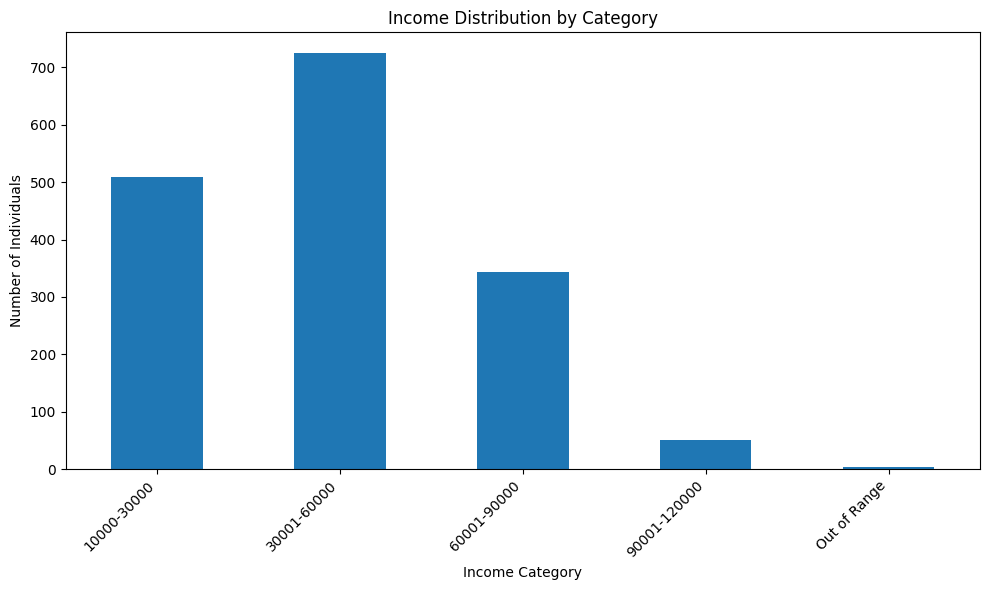

In [6]:
# 划分收入层次 
def categorize_income(income): 
  if 10000 <= income <= 30000: 
    return '10000-30000' 
  elif 30000 < income <= 60000: 
    return '30001-60000' 
  elif 60000 < income <= 90000: 
    return '60001-90000' 
  elif 90000 < income <= 120000: 
    return '90001-120000' 
  else: 
    return 'Out of Range' # 处理不在指定范围内的收入 
 
# 应用分类函数 YearlyIncome
df['IncomeCategory'] = df['YearlyIncome'].apply(categorize_income) 
 
# 统计每个类别的数量 
income_category_counts = df['IncomeCategory'].value_counts().sort_index() 
 
# 绘制柱状图 
plt.figure(figsize=(10, 6)) # 设置图形大小 
income_category_counts.plot(kind='bar') 
plt.xlabel('Income Category') 
plt.ylabel('Number of Individuals') 
plt.title('Income Distribution by Category') 
plt.xticks(rotation=45, ha='right') # 旋转x轴标签，以便更好地显示 
plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域 
plt.show()

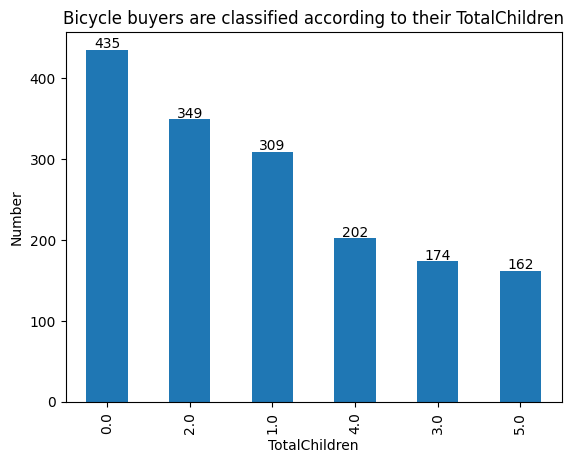

In [7]:
# 将日期时间数据转换为出生年份
child_counts = df['TotalChildren'].value_counts()

# 生成柱状图
ax=child_counts.plot(kind='bar')
plt.xlabel('TotalChildren')
plt.ylabel('Number')
plt.title('Bicycle buyers are classified according to their TotalChildren')

for i, v in enumerate(child_counts):
    ax.text(i, v + 2, str(v), color='black', ha='center')
plt.show()

#### Correlation Analysis and Feature Selection

                      ProspectiveBuyerKey  ProspectAlternateKey  \
ProspectiveBuyerKey              1.000000              0.001399   
ProspectAlternateKey             0.001399              1.000000   
TotalChildren                    0.007963             -0.010871   
NumberChildrenAtHome             0.019523             -0.030861   
HouseOwnerFlag                  -0.072593             -0.022195   
NumberCarsOwned                  0.005128              0.003351   
PostalCode                      -0.000027             -0.007027   
Amount                          -0.026540             -0.021015   
Category_encoded                 0.005079             -0.023561   

                      TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  \
ProspectiveBuyerKey        0.007963              0.019523       -0.072593   
ProspectAlternateKey      -0.010871             -0.030861       -0.022195   
TotalChildren              1.000000              0.545567        0.057544   
NumberChildrenAtHome 

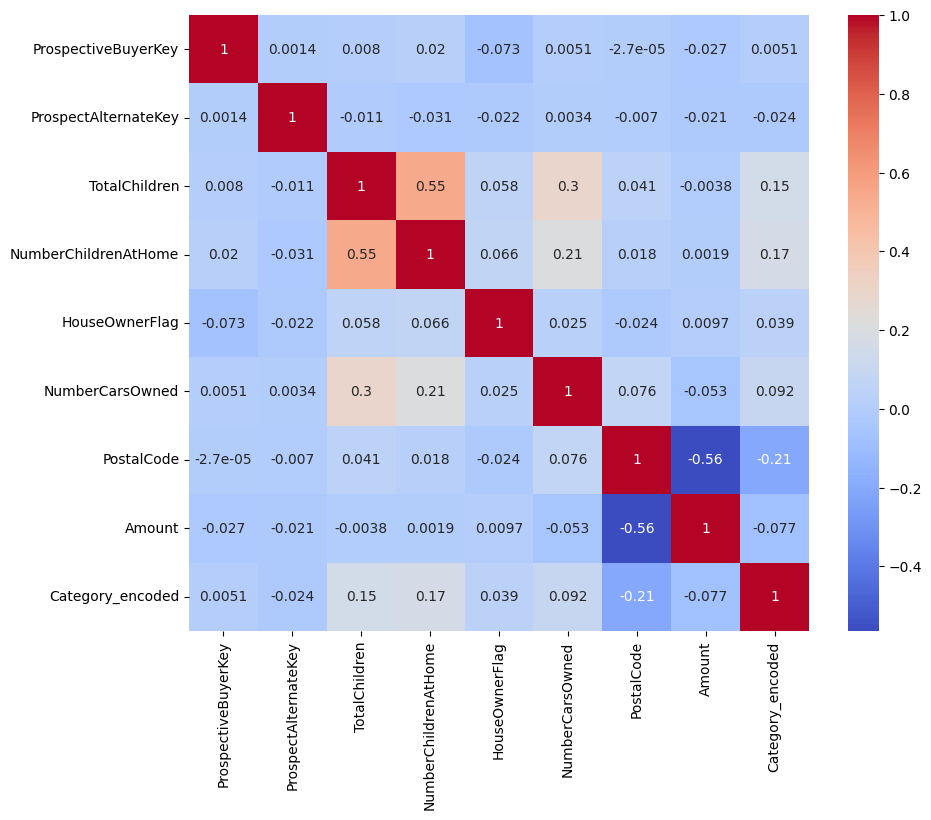

In [8]:
# 创建LabelEncoder实例
label_encoder = LabelEncoder()

# 对'Category'列进行标签编码
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# 确保'Category_encoded'列是整数类型
df['Category_encoded'] = df['Category_encoded'].astype('int64')

numeric_data = df.select_dtypes(include=['int64', 'float64'])
spearman_corr = numeric_data.corr(method='spearman') 
print(spearman_corr)

plt.figure(figsize=(10, 8))

# 使用seaborn绘制热图  
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm') 
plt.show()

#### 与Category最相关的5个变量，按相关性强度排序：
- PostalCode: -0.206579
- NumberChildrenAtHome: 0.167753
- TotalChildren: 0.154639
- NumberCarsOwned: 0.091606
- Amount: -0.076502

所以选择这5个变量作为后面的特征变量

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

#### Linear regression

- by 吴菲涵、马晨烨、杨潇林

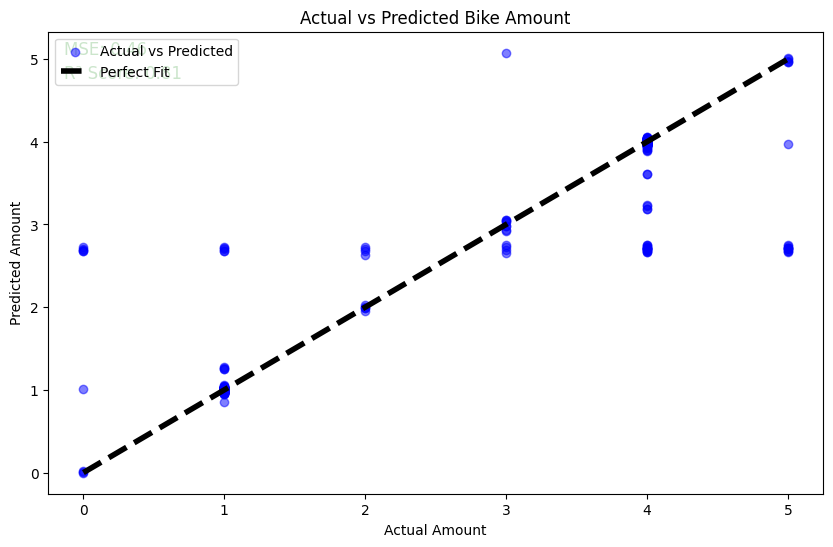

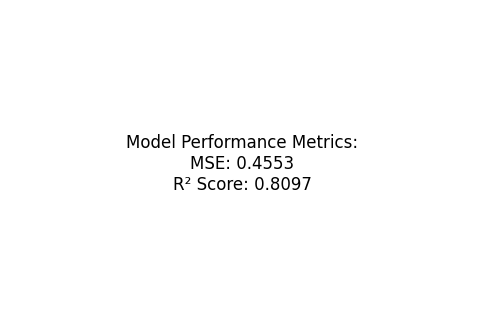

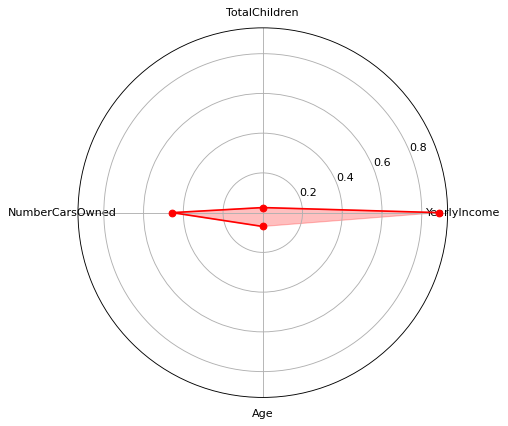

In [9]:

# Enter your code here for linear regression

# 处理缺失值
numeric_features = ['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']
categorical_features = ['MaritalStatus', 'Gender', 'Education', 'Occupation', 'HouseOwnerFlag', 'City']

# 选择特征和标签
X = df.drop(['Amount'], axis=1)
y = df['Amount']

# 编码分类特征
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# 创建整个处理流程
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 绘制实际值与预测值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Perfect Fit')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Bike Amount')
plt.legend()
plt.text(0.02, 0.95, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.02, 0.90, f'R² Score: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.show()

# 创建一个简单的图表，仅用于展示文本
plt.figure(figsize=(6, 4))

# 由于我们不绘制任何数据点或线条，所以可以使用plt.text来添加文本
plt.text(0.5, 0.5, f'Model Performance Metrics:\n'
                   f'MSE: {mse:.4f}\n'
                   f'R² Score: {r2:.4f}',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=12,
         transform=plt.gca().transAxes)  # 使用transAxes来确保文本相对于图表的大小和位置

# 由于我们不绘制任何实际的图表元素，所以不需要坐标轴
plt.axis('off')

# 显示图表
plt.show()

# 从模型中提取系数 
coef = model.named_steps['regressor'].coef_ 
 
# 提取数值特征的系数 
numeric_coef = coef[:len(numeric_features)] 
 
# 标准化系数绝对值，使它们可以比较 
normalized_coef = np.abs(numeric_coef) / np.linalg.norm(np.abs(numeric_coef)) 
 
# 雷达图的角度 
angles = np.linspace(0, 2 * np.pi, len(numeric_features), endpoint=False).tolist() 
 
# 绘制雷达图 
plt.figure(figsize=(6, 6), dpi=80) 
ax = plt.subplot(111, polar=True) 
ax.fill(angles, normalized_coef, color='red', alpha=0.25) 
ax.plot(angles, normalized_coef, color='red', marker='o') 
 
# 设置角度标签 
ax.set_thetagrids(np.degrees(angles), numeric_features) 
 
# 显示图形 
plt.show() 

C:\Windows\Temp\ipykernel_13352\3951375986.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(), inplace=True)
C:\Windows\Temp\ipykernel_13352\3951375986.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

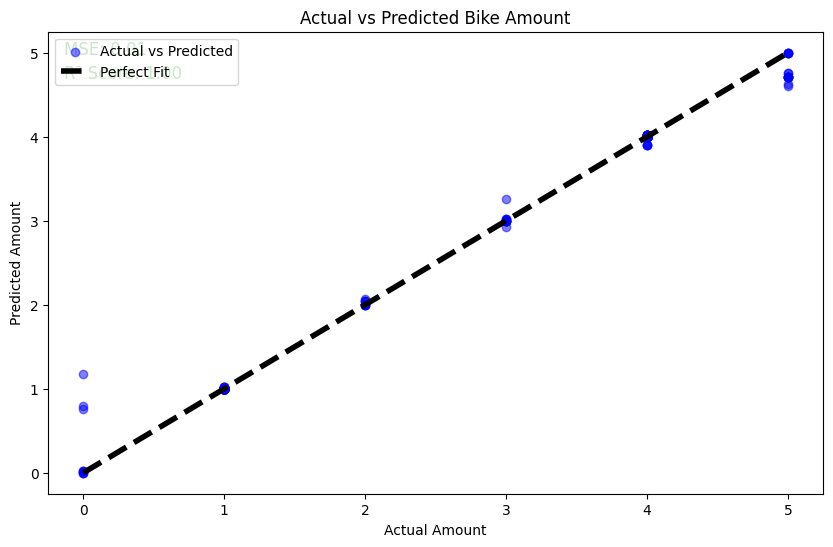

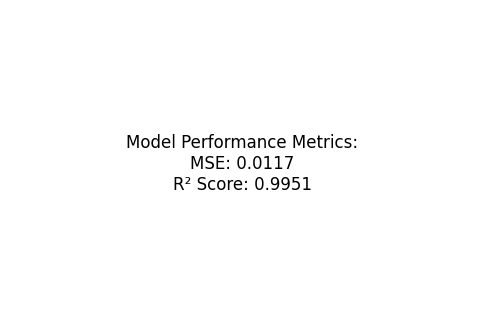

In [10]:

# 处理BirthDate为年龄
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['Age'] = (pd.to_datetime('today') - df['BirthDate']).dt.days / 365.25

# 处理缺失值（这里假设用中位数和众数填充，具体根据你的数据集调整）
numeric_features = ['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'PostalCode']
categorical_features = ['MaritalStatus', 'Gender', 'Education', 'Occupation', 'HouseOwnerFlag', 'City', 'StateProvinceCode']

for feature in numeric_features:
    df[feature].fillna(df[feature].median(), inplace=True)

for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# 处理Gender和MaritalStatus
gender_mapping = {'M': 0, 'F': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

marital_status_mapping = {'M': 0, 'S': 1}  # 根据实际数据调整映射
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)

# 使用LabelEncoder处理其他分类特征
label_encoders = {}
for feature in ['Education', 'Occupation', 'HouseOwnerFlag', 'City', 'StateProvinceCode']:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# 选择特征和标签
X = df.drop(['Amount'], axis=1)
y = df['Amount']

# 编码分类特征
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# 创建整个处理流程
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 绘制实际值与预测值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Perfect Fit')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Bike Amount')
plt.legend()
plt.text(0.02, 0.95, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.02, 0.90, f'R² Score: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.show()

# 创建一个简单的图表，仅用于展示文本
plt.figure(figsize=(6, 4))

# 由于我们不绘制任何数据点或线条，所以可以使用plt.text来添加文本
plt.text(0.5, 0.5, f'Model Performance Metrics:\n'
                   f'MSE: {mse:.4f}\n'
                   f'R² Score: {r2:.4f}',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=12,
         transform=plt.gca().transAxes)  # 使用transAxes来确保文本相对于图表的大小和位置

# 由于我们不绘制任何实际的图表元素，所以不需要坐标轴
plt.axis('off')
# 显示图表
plt.show()


### Logistic regression

- by 马晨烨、阮扬程

c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


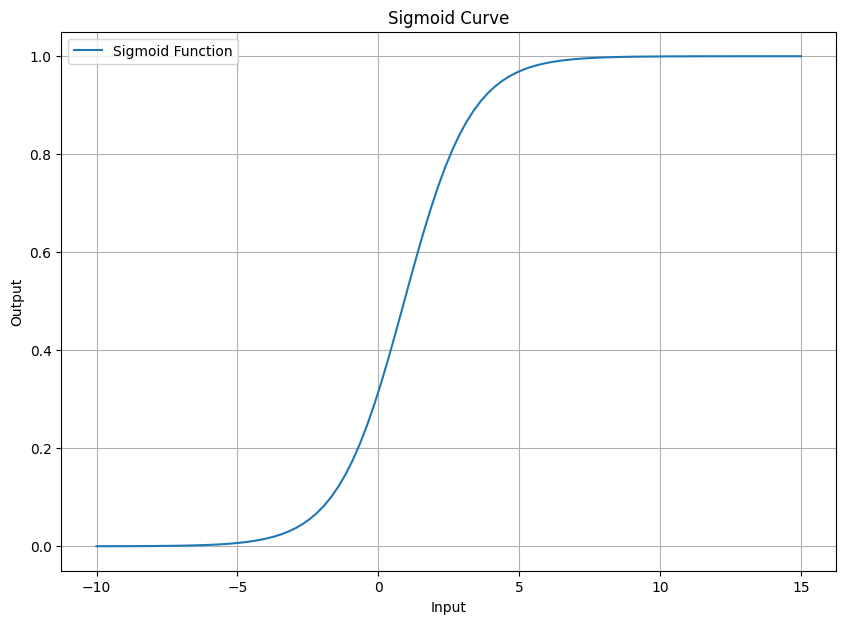

Accuracy: 0.5565749235474006
分类报告:
               precision    recall  f1-score   support

  category 1       0.53      0.83      0.65        52
  category 2       0.63      0.75      0.68        59
  category 3       0.57      0.80      0.67        44
  category 4       0.53      0.82      0.65        38
  category 5       0.75      0.46      0.57        26
  category 6       0.30      0.17      0.22        40
  category 7       0.70      0.30      0.42        23
  category 8       0.40      0.18      0.25        11
  category 9       0.33      0.03      0.05        34

    accuracy                           0.56       327
   macro avg       0.53      0.48      0.46       327
weighted avg       0.53      0.56      0.51       327



In [11]:
# 特征选择
X = df[['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']]
y = df['Category']

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 获取模型的系数和截距
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 选择一个特征（例如 'Amount'）并生成输入数据范围
amount_range = np.linspace(X['Amount'].min() - 10, X['Amount'].max() + 10, 100)

# 计算对应的 sigmoid 输出
y_sigmoid = sigmoid(coefficients[3] * amount_range + intercept)

# 绘制 sigmoid 曲线
plt.figure(figsize=(10, 7))
plt.plot(amount_range, y_sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Curve')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# 性能评估
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

### KNN

- by 马晨烨、秦睿思、杨潇林

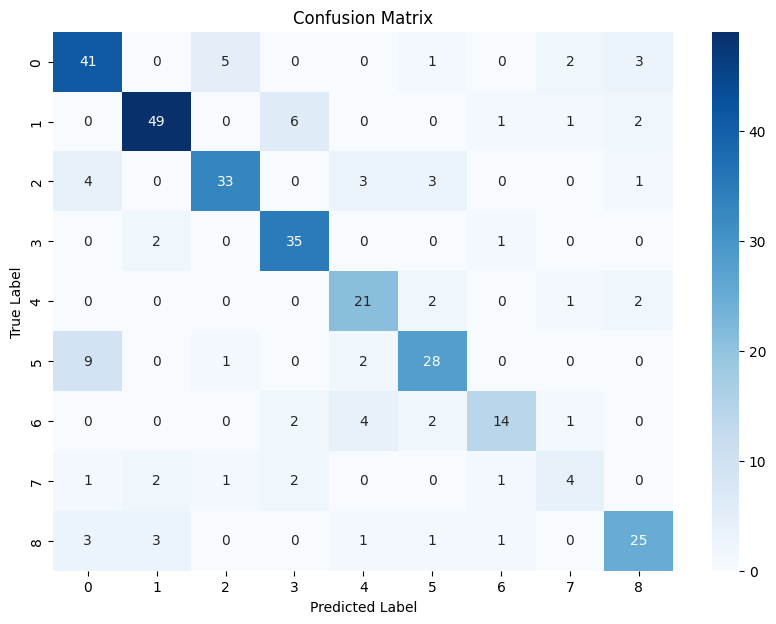

Accuracy: 0.764525993883792
分类报告:
               precision    recall  f1-score   support

  category 1       0.71      0.79      0.75        52
  category 2       0.88      0.83      0.85        59
  category 3       0.82      0.75      0.79        44
  category 4       0.78      0.92      0.84        38
  category 5       0.68      0.81      0.74        26
  category 6       0.76      0.70      0.73        40
  category 7       0.78      0.61      0.68        23
  category 8       0.44      0.36      0.40        11
  category 9       0.76      0.74      0.75        34

    accuracy                           0.76       327
   macro avg       0.73      0.72      0.72       327
weighted avg       0.77      0.76      0.76       327



In [12]:

# X是特征数据，y是目标变量
X = df[['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 测试集的比例为20%，随机种子为42

k = 3  # 选择K值
knn = KNeighborsClassifier(n_neighbors=k)
# 使用自带的函数进行KNN分类，考虑最近的3个邻居

knn.fit(X_train, y_train) # 训练模型

y_pred = knn.predict(X_test)


# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵热图
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))


- **混淆矩阵**：显示了模型预测每个类别的准确性，对角线表示正确预测的数量。
- **精度**：预测为正类的样本中实际为正类的比例。
- **召回率**（也称为真正率）：实际为正类的样本中被预测为正类的比例。
- **F1得分**：精度和召回率的调和平均，用于平衡两者的重要性。


### Tree-based model

- by 吴菲涵

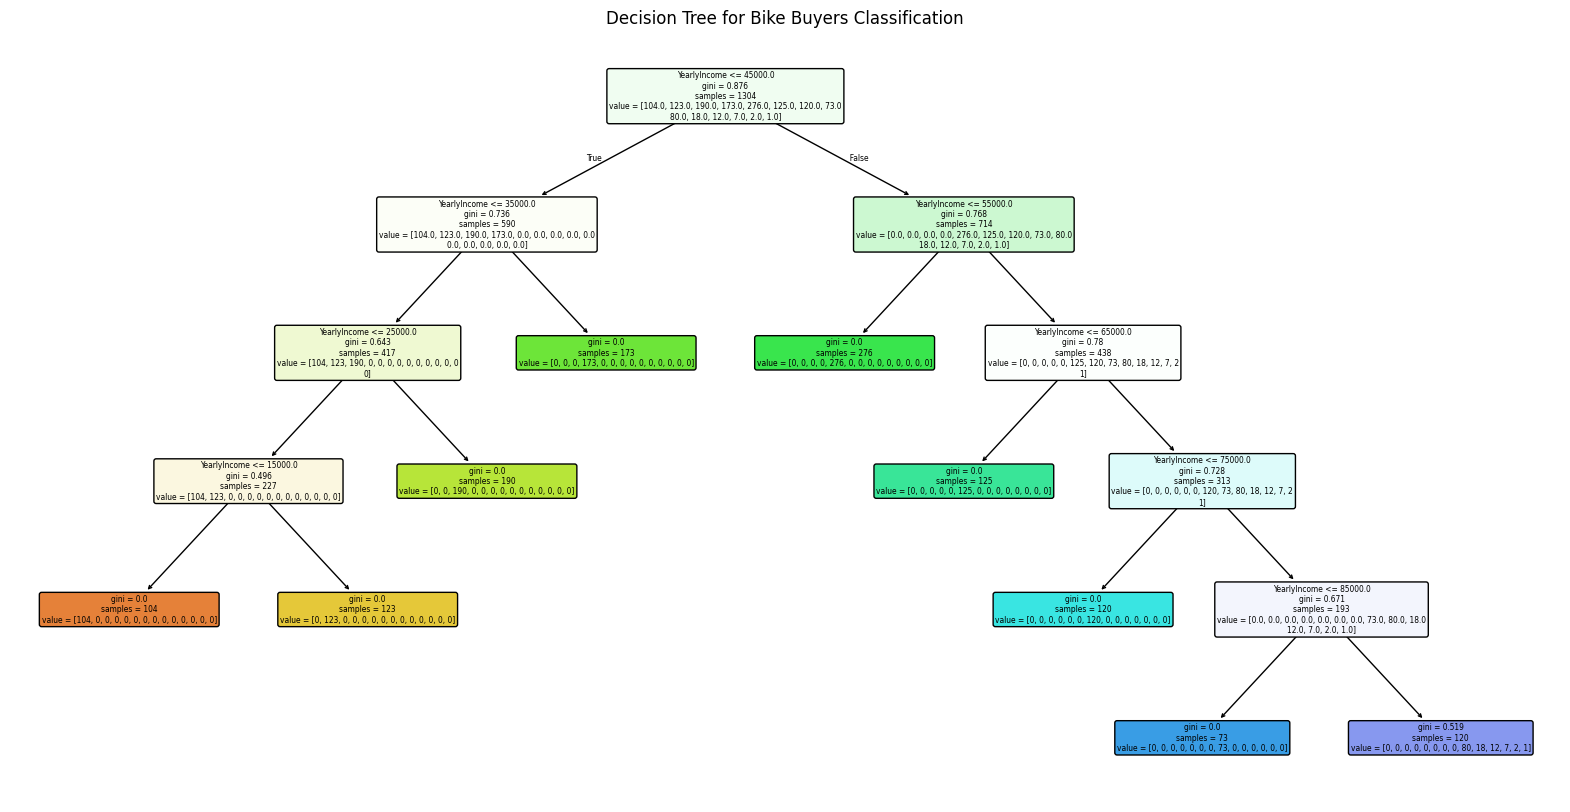

|--- YearlyIncome <= 45000.00
|   |--- YearlyIncome <= 35000.00
|   |   |--- YearlyIncome <= 25000.00
|   |   |   |--- YearlyIncome <= 15000.00
|   |   |   |   |--- class: 10000
|   |   |   |--- YearlyIncome >  15000.00
|   |   |   |   |--- class: 20000
|   |   |--- YearlyIncome >  25000.00
|   |   |   |--- class: 30000
|   |--- YearlyIncome >  35000.00
|   |   |--- class: 40000
|--- YearlyIncome >  45000.00
|   |--- YearlyIncome <= 55000.00
|   |   |--- class: 50000
|   |--- YearlyIncome >  55000.00
|   |   |--- YearlyIncome <= 65000.00
|   |   |   |--- class: 60000
|   |   |--- YearlyIncome >  65000.00
|   |   |   |--- YearlyIncome <= 75000.00
|   |   |   |   |--- class: 70000
|   |   |   |--- YearlyIncome >  75000.00
|   |   |   |   |--- YearlyIncome <= 85000.00
|   |   |   |   |   |--- class: 80000
|   |   |   |   |--- YearlyIncome >  85000.00
|   |   |   |   |   |--- class: 90000



In [13]:
# Enter your code here for tree-based decision model
# drop_first=True 意味着会丢弃第一个类别以避免虚拟变量陷阱。
df = pd.get_dummies(df, columns=['MaritalStatus', 'Gender', 'Education', 'Occupation', 'City'], drop_first=True)

# 选择了一些特征进行模型训练
features = ['YearlyIncome', 'TotalChildren', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age'] + \
           list(df.columns[df.columns.str.startswith(('MaritalStatus', 'Gender', 'Education', 'Occupation', 'City'))])

# 特征集 X，包括所有选择的特征
X = df[features]  # 特征集

# 目标变量（可以替换为别的分类目标）
y = df['YearlyIncome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建分类器
model = DecisionTreeClassifier(max_leaf_nodes=9, random_state=42) 

# 训练模型
model.fit(X_train, y_train)  

# 使用 matplotlib 绘制决策树
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree for Bike Buyers Classification')# 添加标题
plt.show()  # 显示图形

# 步骤 6: 输出分类规则
# 导出决策树的文本规则
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)  # 打印分类规则

### Gradient Boosting Trees

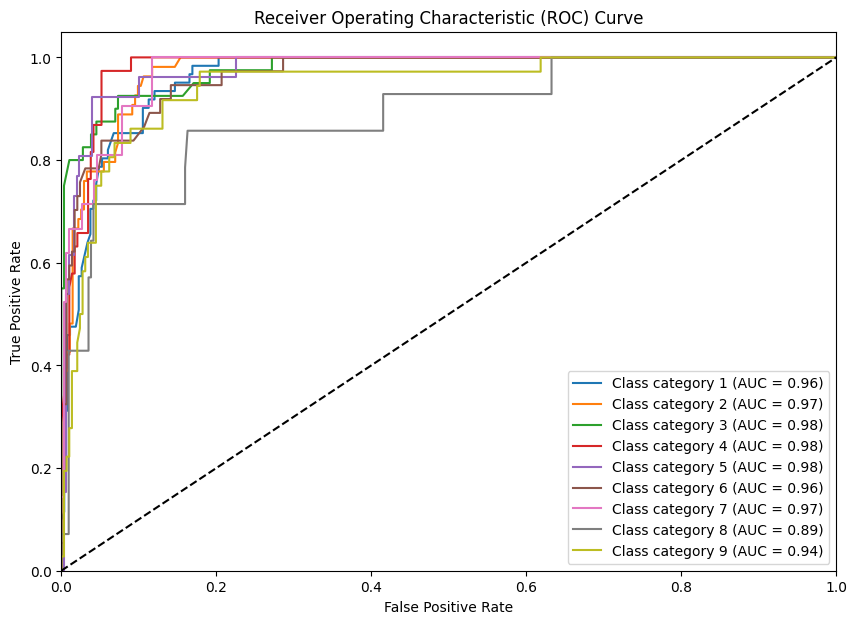

模型准确率: 0.7308868501529052
分类报告:
               precision    recall  f1-score   support

  category 1       0.74      0.85      0.79        61
  category 2       0.70      0.89      0.78        54
  category 3       0.86      0.80      0.83        40
  category 4       0.76      0.66      0.70        38
  category 5       0.73      0.73      0.73        26
  category 6       0.78      0.68      0.72        37
  category 7       0.62      0.62      0.62        21
  category 8       0.46      0.43      0.44        14
  category 9       0.73      0.53      0.61        36

    accuracy                           0.73       327
   macro avg       0.71      0.69      0.69       327
weighted avg       0.73      0.73      0.73       327



In [14]:
# Enter your code here for Gradient Boosting

# 选择特征和目标变量
X = df[['PostalCode', 'TotalChildren', 'NumberChildrenAtHome', 'Amount', 'NumberCarsOwned']]
y = df['Category']  # 目标变量

# 使用 LabelEncoder 编码目标变量
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 分割数据集为训练集和测试集，确保分割后的数据集平衡
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 创建和训练 Gradient Boosting 模型
gb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42))
gb_clf.fit(X_train, y_train)

# 模型预测
y_pred = gb_clf.predict(X_test)

# 计算 ROC 曲线和 AUC
y_prob = gb_clf.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

# 如果是多分类问题，计算每个类别的 ROC 曲线
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制 ROC 曲线
plt.figure(figsize=(10, 7))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy}")
print("分类报告:\n", classification_report(y_test, y_pred, target_names=le.classes_))

### Unsupervised learning with K-Means

- by 秦睿思、马晨烨

Silhouette Score for k=3: 0.5887762094065756
Silhouette Score for k=9: 0.8278852127766994


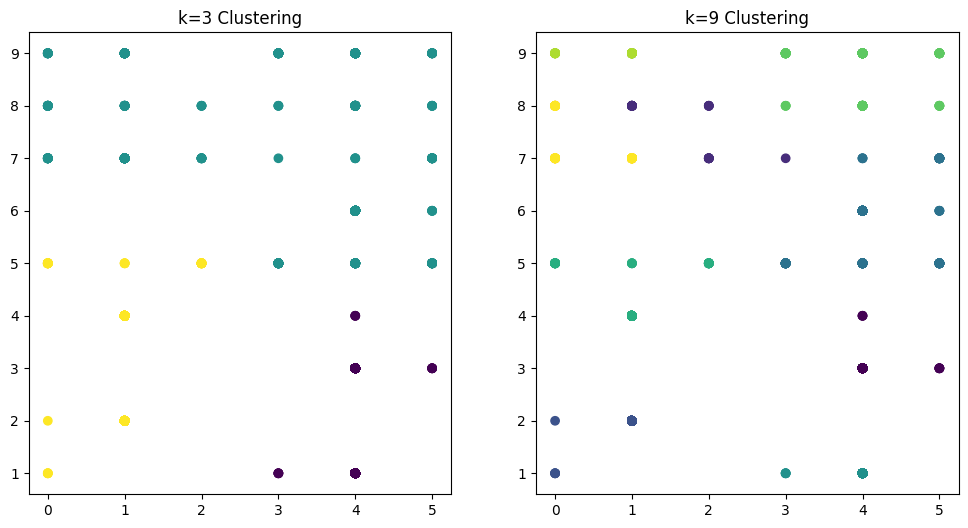

In [15]:
# Enter your code here for K-means

# 创建LabelEncoder实例
label_encoder = LabelEncoder()

# 对'Category'列进行标签编码
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])+1


X = df[['Amount','Category_encoded']].values

# 使用k=3进行k-means聚类
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(X)

# 使用k=9进行k-means聚类
kmeans_9 = KMeans(n_clusters=9, random_state=42)
labels_9 = kmeans_9.fit_predict(X)

# 计算轮廓系数
silhouette_avg_3 = silhouette_score(X, labels_3)
silhouette_avg_9 = silhouette_score(X, labels_9)

print(f"Silhouette Score for k=3: {silhouette_avg_3}")
print(f"Silhouette Score for k=9: {silhouette_avg_9}")

# 可视化结果
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# k=3的聚类结果
ax[0].scatter(X[:, 0], X[:, 1], c=labels_3)
ax[0].set_title('k=3 Clustering')

# k=9的聚类结果
ax[1].scatter(X[:, 0], X[:, 1], c=labels_9)
ax[1].set_title('k=9 Clustering')

plt.show()

左图（k=3）：
当k=3时，K-means算法将数据分为三个簇。我们可以看到图中显示了三个不同颜色的簇，每个簇由K-means算法识别并标记。。

右图（k=9）：
当k=9时，K-means算法将数据分为九个簇。相比k=3时，聚类的细分更多，每个簇更小。

分析比较：
k=3的情况下，聚类的结果显示出相对大的簇，每个簇的形状比较集中。

k=9的情况下，数据被更细化地划分为多个小簇，每个簇的中心更接近其内部数据点的平均位置。

- 横坐标为Amount，纵坐标为Category
- K=3 表示分为3簇；K=9表示分为9簇
- 离得近的为一簇
- 轮廓系数越大聚类效果越好

### DBSCAN

- by 秦睿思

C:\Windows\Temp\ipykernel_13352\857621068.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


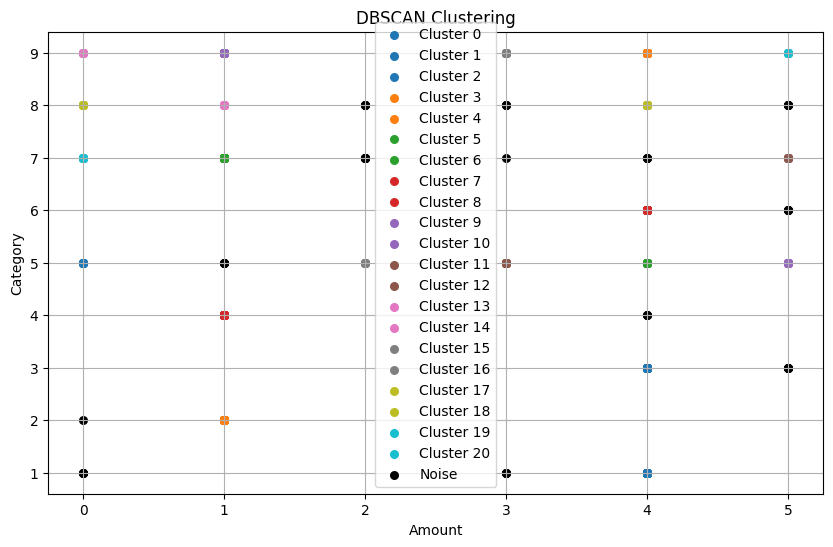

In [16]:
X = df[['Amount','Category_encoded']].values  # 提取需要处理的特征作为numpy数组

# 如果数据不是同一量级，可以进行标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3  # 邻域半径
min_samples = 10  # 最小样本数
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# 将结果添加到数据框中
df['Cluster'] = labels

plt.figure(figsize=(10, 6))

# 提取每个簇的数据
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    if label == -1:
        # 如果是噪声点，以黑色单独标记
        plt.scatter(X[labels == label, 0], X[labels == label, 1], color='black', s=30, label='Noise')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], color=colors(i), s=30, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest

- by 马晨烨、阮扬程、吴菲涵

<Figure size 1000x700 with 0 Axes>

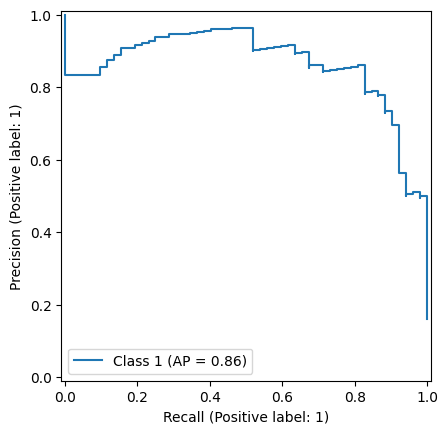

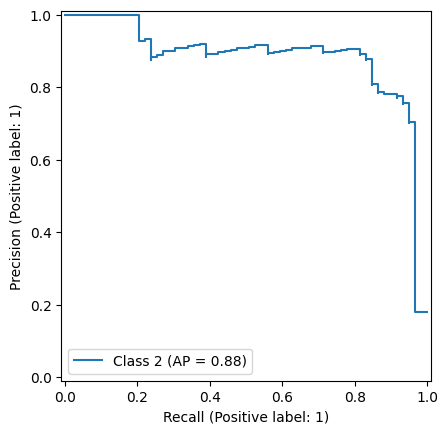

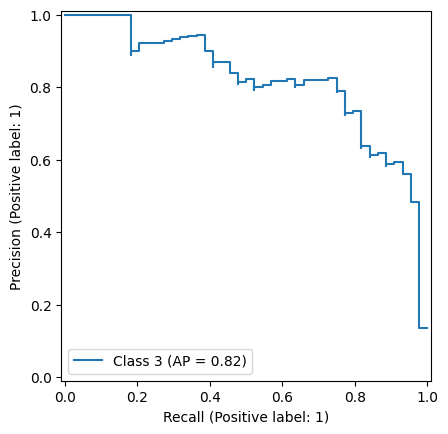

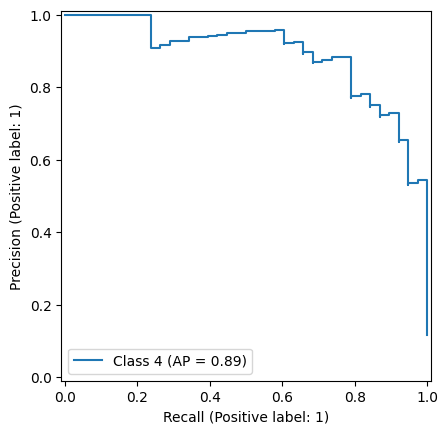

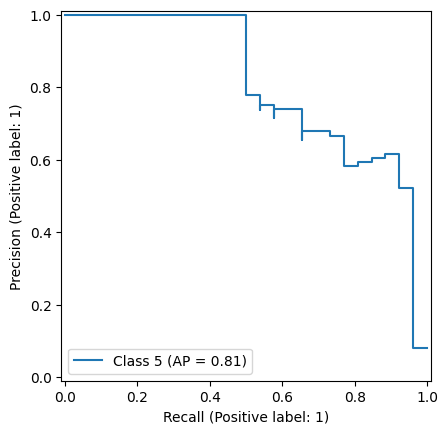

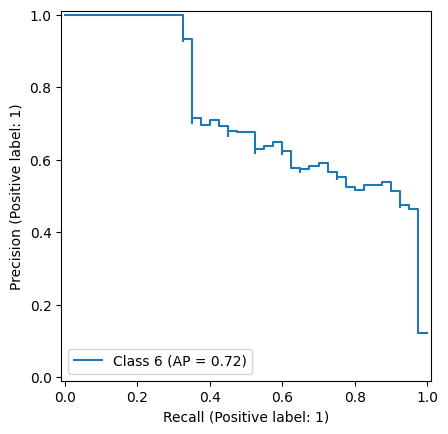

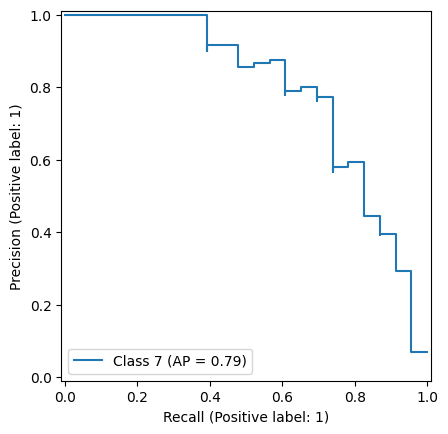

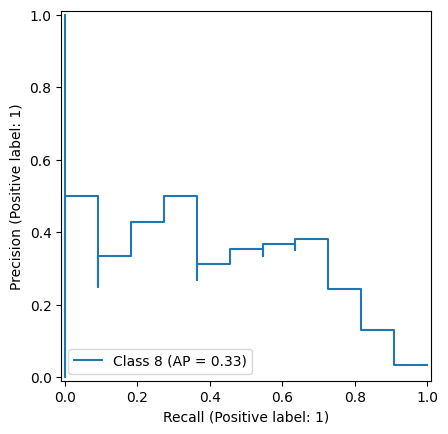

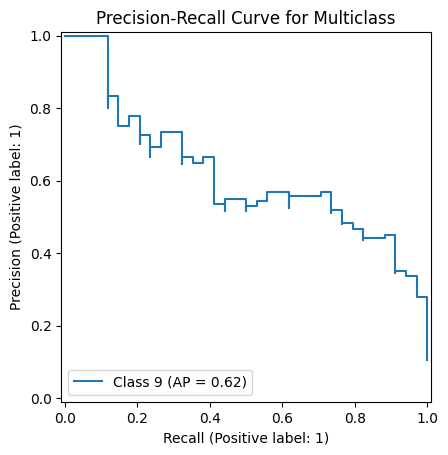

准确率: 0.6788990825688074
分类报告:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        52
           1       0.90      0.75      0.81        59
           2       0.79      0.75      0.77        44
           3       0.78      0.84      0.81        38
           4       0.74      0.54      0.62        26
           5       0.63      0.60      0.62        40
           6       0.87      0.57      0.68        23
           7       0.36      0.36      0.36        11
           8       0.55      0.62      0.58        34

   micro avg       0.75      0.70      0.72       327
   macro avg       0.72      0.65      0.68       327
weighted avg       0.76      0.70      0.72       327
 samples avg       0.69      0.70      0.69       327



c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# 分离特征和目标变量
X = df[['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']]
y = df['Category']
# 将目标变量二值化
y_bin = label_binarize(y, classes=range(len(df['Category'].unique())))

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# 创建和训练一对多的随机森林模型
ovr_rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_rf_model.fit(X_train, y_train)

# 绘制每个类别的精确率-召回率曲线
plt.figure(figsize=(10, 7))
for i in range(y_bin.shape[1]):
    PrecisionRecallDisplay.from_estimator(ovr_rf_model.estimators_[i], X_test, y_test[:, i], name=f"Class {i+1}")

plt.title('Precision-Recall Curve for Multiclass')
plt.show()

# 评估模型
y_pred = ovr_rf_model.predict(X_test)
print("准确率:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

### AdaBoost

- by 吴菲涵、杨潇林

Accuracy: 0.5045871559633027
分类报告:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57        52
           1       0.53      0.95      0.68        59
           2       0.49      0.93      0.64        44
           3       0.00      0.00      0.00        38
           4       0.69      0.42      0.52        26
           5       0.18      0.05      0.08        40
           6       0.50      0.48      0.49        23
           7       0.50      0.27      0.35        11
           8       0.43      0.26      0.33        34

    accuracy                           0.50       327
   macro avg       0.43      0.44      0.41       327
weighted avg       0.42      0.50      0.43       327



c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

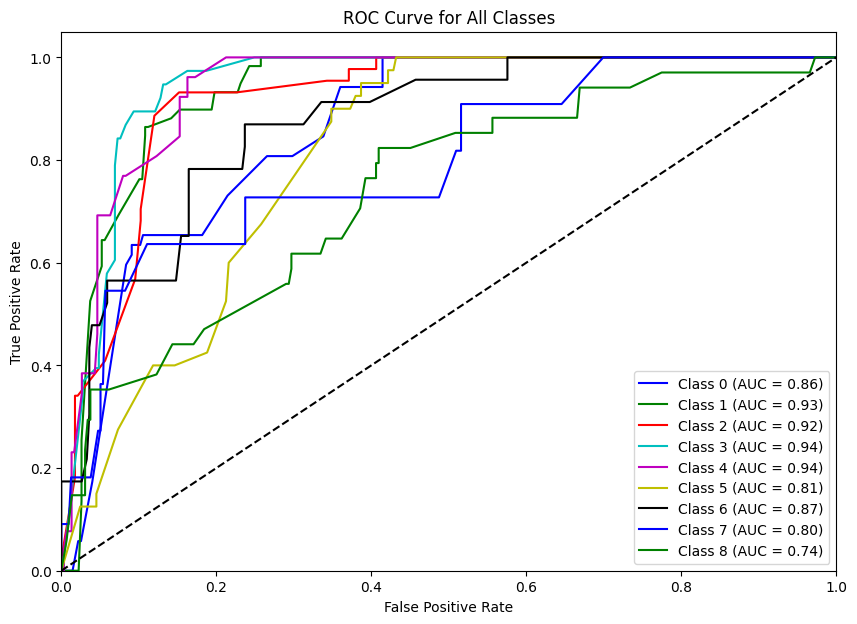

In [18]:
# 假设 df 已经被定义并包含了所需的数据 
X = df[['PostalCode', 'TotalChildren', 'NumberChildrenAtHome', 'Amount', 'NumberCarsOwned']] 
y = df['Category'] 
 
# 分割数据集为训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
# 初始化 AdaBoost 分类器 
ada = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42) 
 
# 拟合模型 
ada.fit(X_train, y_train) 
 
# 预测测试集 
y_pred = ada.predict(X_test) 
 
# 评估模型 
accuracy = accuracy_score(y_test, y_pred) 
 
 
# 打印准确率和分类报告 
print(f'Accuracy: {accuracy}') 
print("分类报告:\n", classification_report(y_test, y_pred)) 
# 计算并绘制每个类别的ROC曲线 
n_classes = len(np.unique(y_test)) 
if n_classes == 1: 
  print("Warning: Only one class in the test set. ROC curve will not be meaningful.") 
else: 
  plt.figure(figsize=(10, 7)) 
  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # 可以根据需要调整颜色列表 
  for i, cls in enumerate(np.unique(y_test)): 
    y_test_binary = (y_test == cls).astype(int) 
    y_scores = ada.predict_proba(X_test)[:, i] 
    fpr, tpr, _ = roc_curve(y_test_binary, y_scores) 
    roc_auc = auc(fpr, tpr) 
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'Class {cls} (AUC = {roc_auc:.2f})') 
 
  plt.legend(loc="lower right") 
  plt.plot([0, 1], [0, 1], 'k--') # 绘制对角线（随机猜测线） 
  plt.xlim([0.0, 1.0]) 
  plt.ylim([0.0, 1.05]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.title('ROC Curve for All Classes') 
  plt.show()

### PCA

- by 秦睿思

In [19]:
cleaned_data = df.dropna()
# 选择用于PCA的数据列，通常是数值型数据列
selected_columns = ['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']
data_for_pca = cleaned_data[selected_columns]

# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)
# 创建PCA对象
pca = PCA()

# 在标准化后的数据上拟合PCA模型
pca.fit(scaled_data)

# 查看主成分的方差解释比例
print(pca.explained_variance_ratio_)

# 可选择性地，将数据转换到PCA的主成分空间
pca_data = pca.transform(scaled_data)
# 将PCA转换后的数据转为DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']) # 根据实际主成分数目命名列名

# 将PCA转换后的数据与原始数据合并（如果需要）
final_data = pd.concat([cleaned_data.reset_index(drop=True), pca_df], axis=1)

# 可选择性的输出结果或进一步处理
print(final_data.head())

[0.47553569 0.25796938 0.11655797 0.09913934 0.05079762]
   ProspectiveBuyerKey  ProspectAlternateKey MiddleName  BirthDate  \
0                   42           53210049300          l 1948-09-25   
1                   89           53209384083          i 1968-11-04   
2                  102           11696153879          r 1976-11-20   
3                  156           30077423500          f 1954-01-13   
4                  319                  3842          r 1967-01-18   

                   EmailAddress  YearlyIncome  TotalChildren  \
0    agarcia@alpineskihouse.com         50000            4.0   
1  amartin@northwindtraders.com         40000            0.0   
2        amurphy@litwareinc.com         40000            1.0   
3    asimmons@margiestravel.com         80000            5.0   
4              cbhat@adatum.com         70000            0.0   

   NumberChildrenAtHome  HouseOwnerFlag NumberCarsOwned  ... City_324  \
0                     0               0             2.0  ...    

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. 

#### Cross validation

- by 阮扬程

c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression Accuracy: 0.5088810401310401
knn Accuracy: 0.7265756732668498
knn with cv=4 Accuracy: 0.7265756732668498
knn with cv=10 Accuracy: 0.7388410893311388


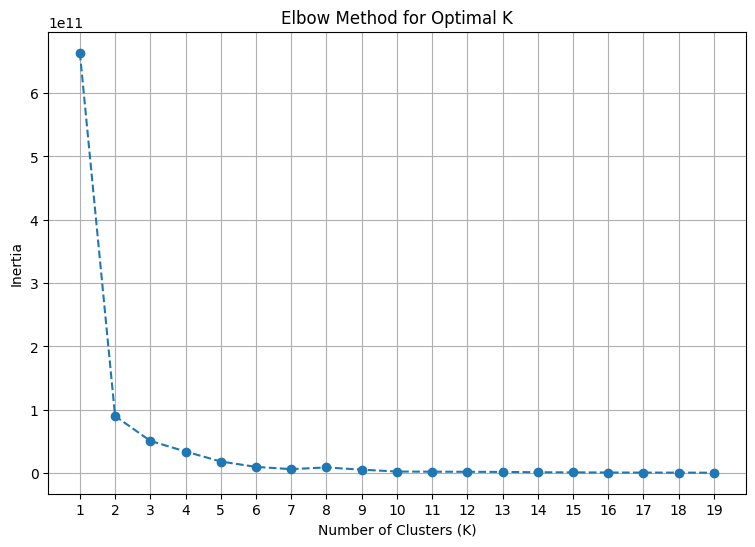

In [20]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

X = df[['PostalCode','TotalChildren','NumberChildrenAtHome','Amount','NumberCarsOwned']]
y = df['Category']

logistic_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)

# 交叉验证比较模型性能
logistic_scores = cross_val_score(logistic_reg, X, y, cv=4, scoring='accuracy')
knn_scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')

# 输出每个模型的交叉验证准确率
print("Logistic Regression Accuracy:", logistic_scores.mean())
print("knn Accuracy:", knn_scores.mean())


#进行k不同交叉验证
knn_scores_cv4 = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
knn_scores_cv10 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# 输出k为不同值的交叉验证准确率
print("knn with cv=4 Accuracy:", knn_scores_cv4.mean())
print("knn with cv=10 Accuracy:", knn_scores_cv10.mean())
#绘制肘部曲线以找到最好的k值
elbow = []

for i in range(1, 20): # 创建遍历，找到最合适的k值
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
  kmeans.fit(X)
  elbow.append(kmeans.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(range(1, 20), elbow, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 20, 1))
plt.grid(True)
plt.show()

In [21]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": ovr_rf_model,
    "KNN": knn,
    "AdaBoost": ada,
    "Gradient Boosting": gb_clf
}

# 评估模型
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression Accuracy: 0.51 (+/- 0.01)
Random Forest Accuracy: 0.71 (+/- 0.02)
KNN Accuracy: 0.73 (+/- 0.02)
AdaBoost Accuracy: 0.50 (+/- 0.02)
Gradient Boosting Accuracy: 0.77 (+/- 0.03)
